In [1]:
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

## S-phase distribution for labelled dataset (based on manual labels)

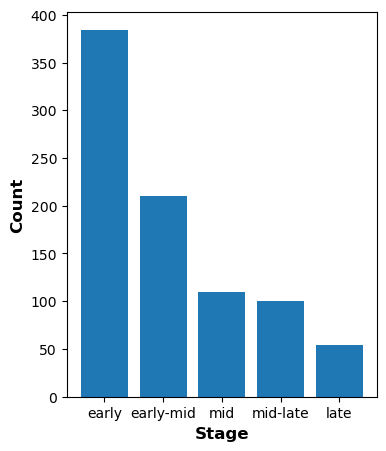

In [2]:
# Read file
df = pd.read_csv('../annotation/annotation_mESC/nuclei_mESC_sphase_labelled.tsv', sep='\t')

# Bar plot
dist = df['sphase'].value_counts()
dist.index = ['early', 'early-mid', 'mid', 'mid-late', 'late']
plt.figure(figsize=(4, 5))
plt.bar(dist.index, dist)
plt.xlabel('Stage', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold');

## S-phase distribution for full dataset (based on predicted labels)
- Bar plots
- Statistics

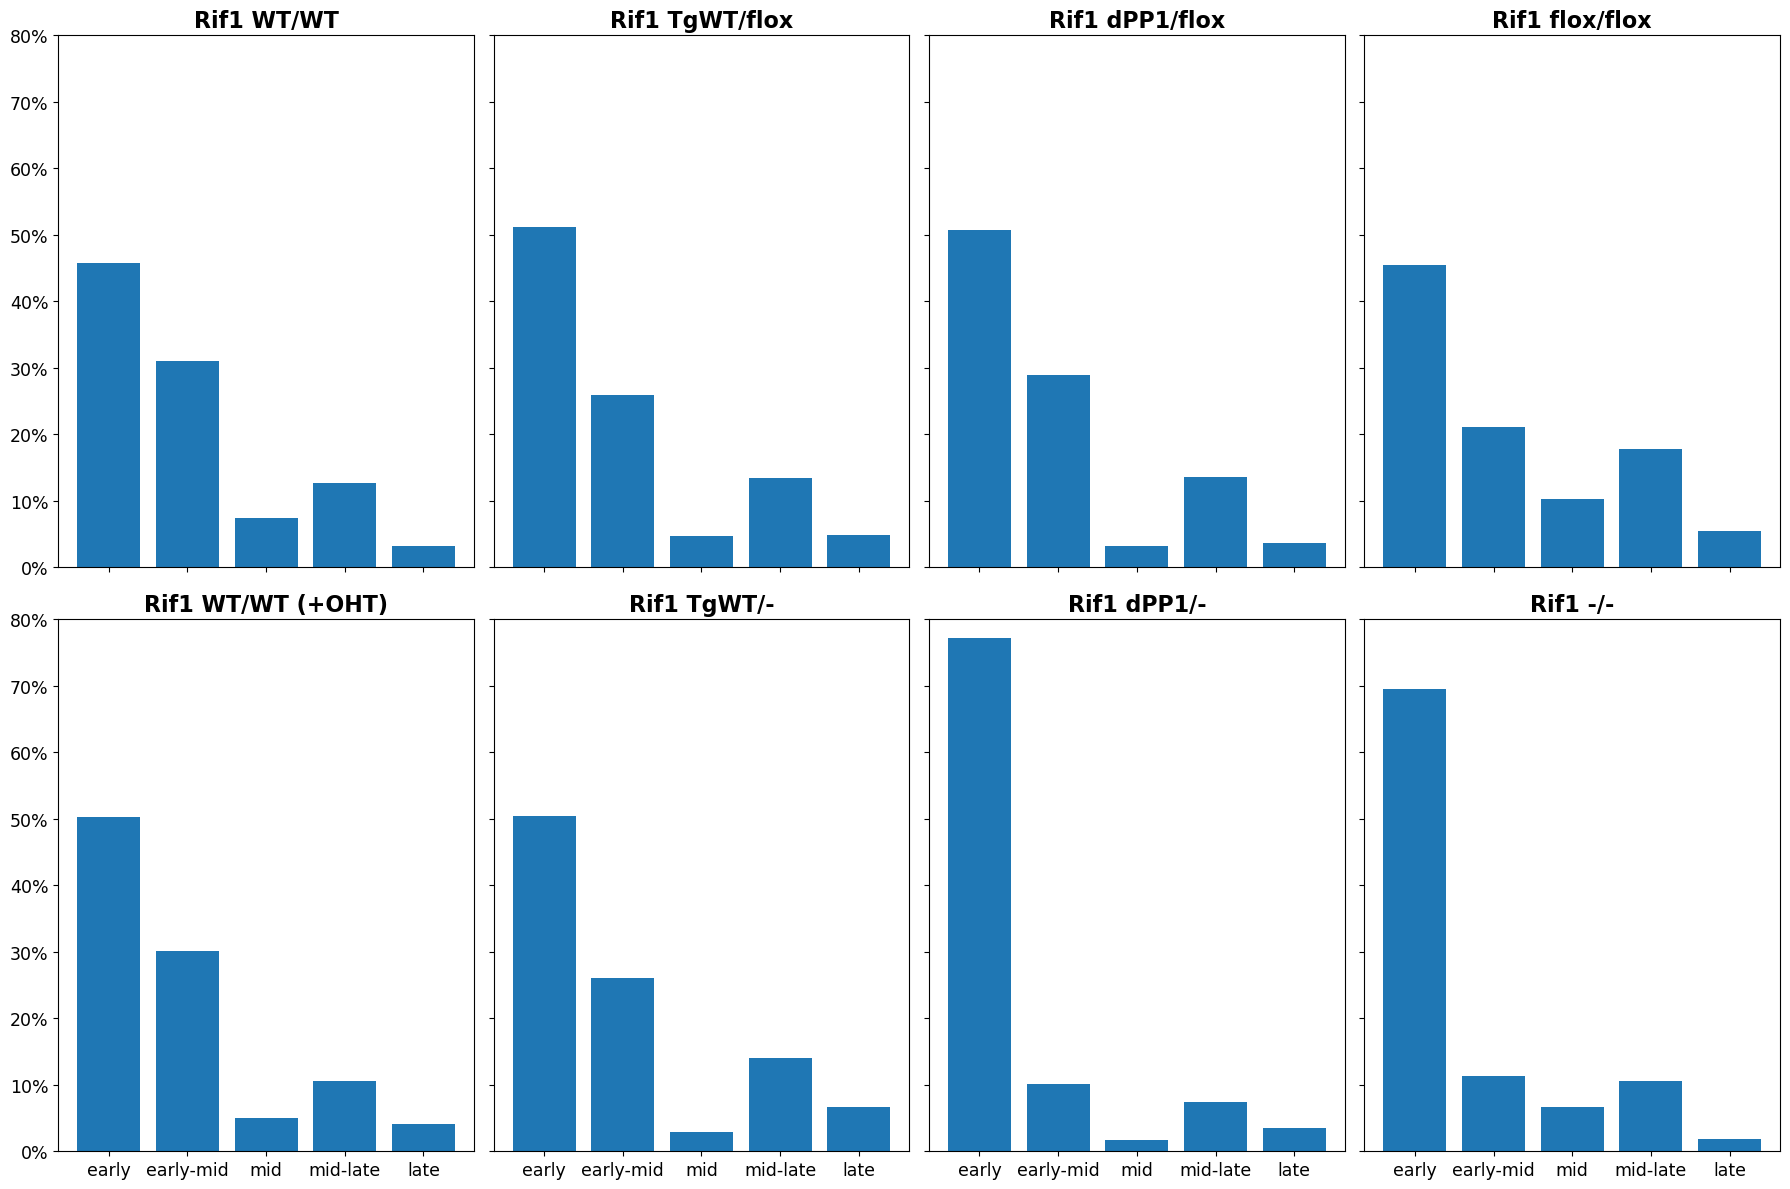

In [3]:
# Read file
df = pd.read_csv('../annotation/annotation_mESC/nuclei_mESC_sphase_all.tsv', sep='\t') 

# Bar plots
labels = ['early', 'early-mid', 'mid', 'mid-late', 'late']
genotypes = ['Rif1 WT/WT', 'Rif1 TgWT/flox', 'Rif1 dPP1/flox', 'Rif1 flox/flox', 'Rif1 WT/WT (+OHT)', 'Rif1 TgWT/-', 'Rif1 dPP1/-', 'Rif1 -/-']  

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 12), sharex=True, sharey=True)    

for ax, genotype in zip(axes.flatten(), genotypes):
        
    dfGroup = df[df['genotype'] == genotype]
    X = dfGroup['sphase'].value_counts().sort_index()

    ax.bar(labels, X/X.sum() * 100)
    ax.set_title(genotype, fontsize=16, fontweight='bold')
    ax.set_ylim(0, 80)
    ax.xaxis.set_tick_params(labelsize=12.5)
    ax.yaxis.set_tick_params(labelsize=12.5)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())      
plt.tight_layout()

In [4]:
# Statistics (based on Chi-squared test)
groups1 = ['Rif1 WT/WT', 'Rif1 TgWT/flox', 'Rif1 dPP1/flox', 'Rif1 flox/flox']
groups2 = ['Rif1 WT/WT (+OHT)', 'Rif1 TgWT/-', 'Rif1 dPP1/-', 'Rif1 -/-']  

for group1, group2 in zip(groups1, groups2):
    
    dfGroup1 = df[df['genotype'] == group1]
    dfGroup2 = df[df['genotype'] == group2]
    
    X = dfGroup1['sphase'].value_counts().sort_index()
    Y = dfGroup2['sphase'].value_counts().sort_index()
    
    # Chi-squared test
    table = pd.concat([X, Y], axis=1)
    stat, p_value, dof, expected = stats.chi2_contingency(table)
    
    print(group1)
    print("N1:", dfGroup1.shape[0], "\tN2:", dfGroup2.shape[0])
    print(f'p-value: {p_value:.1e}')  

Rif1 WT/WT
N1: 4941 	N2: 10174
p-value: 1.4e-14
Rif1 TgWT/flox
N1: 5487 	N2: 1745
p-value: 9.6e-04
Rif1 dPP1/flox
N1: 9004 	N2: 3500
p-value: 9.7e-168
Rif1 flox/flox
N1: 7994 	N2: 2283
p-value: 8.4e-90


## S-phase distribution for full dataset (based on predicted labels for Boyd et al. model)
- Bar plots
- Statistics

In [5]:
# Read file
df = pd.read_csv('../annotation/annotation_mESC/nuclei_mESC_sphase_all_CY5.tsv', sep='\t') 

# Bar plots
labels = ['early', 'early-mid', 'mid', 'mid-late', 'late']
genotypes = ['Rif1 WT/WT', 'Rif1 TgWT/flox', 'Rif1 dPP1/flox', 'Rif1 flox/flox', 'Rif1 WT/WT (+OHT)', 'Rif1 TgWT/-', 'Rif1 dPP1/-', 'Rif1 -/-']  

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 12), sharex=True, sharey=True)    

for ax, genotype in zip(axes.flatten(), genotypes):
        
    dfGroup = df[df['genotype'] == genotype]
    X = dfGroup['sphase'].value_counts().sort_index()

    ax.bar(labels, X/X.sum() * 100)
    ax.set_title(genotype, fontsize=16, fontweight='bold')
    ax.set_ylim(0, 80)
    ax.xaxis.set_tick_params(labelsize=12.5)
    ax.yaxis.set_tick_params(labelsize=12.5)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())      
plt.tight_layout()

In [6]:
# Statistics (based on Chi-squared test)
groups1 = ['Rif1 WT/WT', 'Rif1 TgWT/flox', 'Rif1 dPP1/flox', 'Rif1 flox/flox']
groups2 = ['Rif1 WT/WT (+OHT)', 'Rif1 TgWT/-', 'Rif1 dPP1/-', 'Rif1 -/-']  

for group1, group2 in zip(groups1, groups2):
    
    dfGroup1 = df[df['genotype'] == group1]
    dfGroup2 = df[df['genotype'] == group2]
    
    X = dfGroup1['sphase'].value_counts().sort_index()
    Y = dfGroup2['sphase'].value_counts().sort_index()
    
    # Chi-squared test
    table = pd.concat([X, Y], axis=1)
    stat, p_value, dof, expected = stats.chi2_contingency(table)
    
    print(group1)
    print("N1:", dfGroup1.shape[0], "\tN2:", dfGroup2.shape[0])
    print(f'p-value: {p_value:.1e}')  

Rif1 WT/WT
N1: 4941 	N2: 10174
p-value: 9.5e-03
Rif1 TgWT/flox
N1: 5487 	N2: 1745
p-value: 1.2e-09
Rif1 dPP1/flox
N1: 9004 	N2: 3500
p-value: 1.3e-200
Rif1 flox/flox
N1: 7994 	N2: 2283
p-value: 3.9e-108


## S-phase distribution for EdU 5min (based on predicted labels)
- Bar plots


In [7]:
X = np.array([209, 129, 28, 51, 6])

# Bar plots
labels = ['early', 'early-mid', 'mid', 'mid-late', 'late'] 

fig, ax = plt.subplots(figsize=(3.5, 4))    
ax.bar(labels, X/X.sum() * 100)
ax.set_ylim(0, 55)
ax.xaxis.set_tick_params(labelsize=10.0)
ax.yaxis.set_tick_params(labelsize=12.5)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())      

## S-phase distribution for thymidine release 3h (based on predicted labels)
- Bar plots
- Statistics

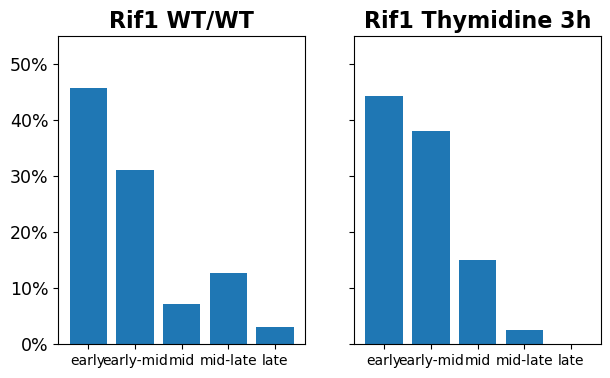

In [8]:
X1 = np.array([2259, 1535, 358, 624, 155])
X2 = np.array([135, 116, 46, 8, 0])

# Bar plots
labels = ['early', 'early-mid', 'mid', 'mid-late', 'late']
genotypes = ['Rif1 WT/WT', 'Rif1 Thymidine 3h']  

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 4), sharex=True, sharey=True)    

for ax, genotype, X in zip(axes.flatten(), genotypes, [X1, X2]):

    ax.bar(labels, X/X.sum() * 100)
    ax.set_title(genotype, fontsize=16, fontweight='bold')
    ax.set_ylim(0, 55)
    ax.xaxis.set_tick_params(labelsize=10.0)
    ax.yaxis.set_tick_params(labelsize=12.5)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())      

In [9]:
# Chi-squared test
dfX = pd.DataFrame()
dfX[1] = X1
dfX[2] = X2

stat, p_value, dof, expected = stats.chi2_contingency(dfX)
print(f'p-value: {p_value:.1e}')  

p-value: 2.0e-12


## DAPI intensity profiles for U2OS experiment (by timepoint)

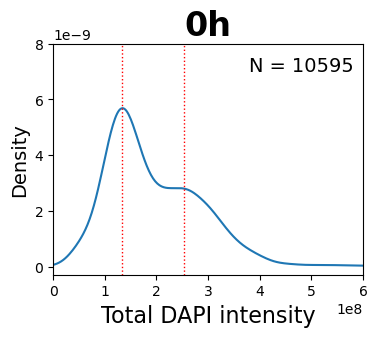

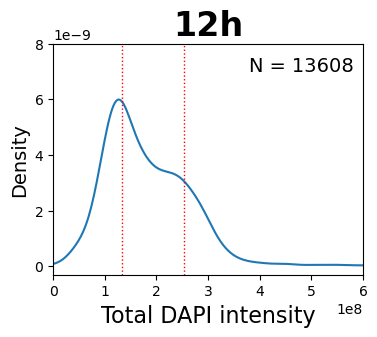

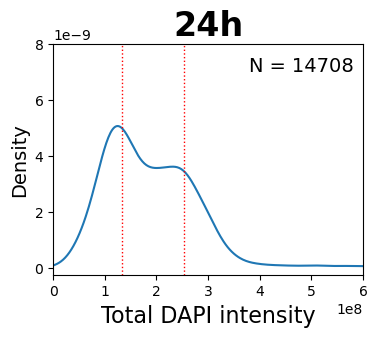

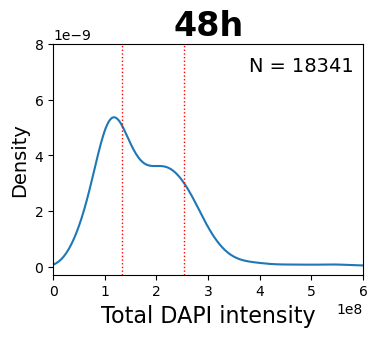

In [10]:
# Read file
df = pd.read_csv('../annotation/annotation_u2os/nuclei_u2os_intensity_total.tsv', sep='\t')

# General settings
timepoints = ['0h', '12h', '24h', '48h', '96h']
counts = df['timepoint'].value_counts().sort_index()
xlim_left, xlim_right, ylim_down, ylim_up = 0, 6e8, None, 8e-9
x_vline1, x_vline2 = 1.34e8, 2.53e8

# KDE plots
for timepoint, count in zip(timepoints, counts):
    
    dfTimepoint = df.loc[df['timepoint'] == timepoint]       
    dfTimepoint['intensity_total'].plot.kde(bw_method=0.2, figsize=(4, 3))
    plt.title(timepoint, fontsize=24, fontweight='bold')
    plt.xlabel('Total DAPI intensity', fontsize=16)
    plt.ylabel('Density', fontsize=14)
    plt.text(3.8e8, 7e-9, f'N = {count}', fontsize=14)
    plt.xlim(xlim_left, xlim_right)
    plt.ylim(ylim_down, ylim_up)
    plt.axvline(x = x_vline1 , color = 'red', linestyle = ':', linewidth = 1.0)
    plt.axvline(x = x_vline2, color = 'red', linestyle = ':', linewidth = 1.0)
    plt.show()